<a href="https://colab.research.google.com/github/meheroob/nlp-cs-tm-s/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Please run the file line by line so that the user interfaces can be used to the fullest. Although, there are default variables which won't throw any error if all the cells are run together but running cell after cell will allow the user to make use of things like input query, topic selection, etc. 😁😁😁

# <b> TASK 1: Preprocess Data

## <b>Mounting Drive</b>

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
# Setting data path
# Please change your data path accordingly
data_path = "/content/drive/My Drive/ColabNotebooks/COP509cw/Datasets/"
!ls "/content/drive/My Drive/ColabNotebooks/COP509cw/Datasets/"

JewelleryReviewsLSA.csv		     JewelleryReviewsSummarisationTargets.csv
JewelleryReviewsQueryRelevantID.csv


Load the CSV file

In [ ]:
import pandas as pd
df = pd.read_csv(data_path  + 'JewelleryReviewsLSA.csv')
documents = df['Reviews'].tolist() 

## <b>Preprocessing</b>

In [ ]:
# Organized starting libraries and APIs in this code block

from numpy import array
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from pandas import DataFrame
from matplotlib import pyplot
import random
import nltk
import numpy
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import rand
from sklearn.metrics.pairwise import cosine_similarity
from numpy import argsort
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# This code was adapted from: https://colab.research.google.com/drive/1hPKj6POGzzUBctsxQ4UKiP7VXfAXQDc5?usp=sharing

# Convert the dataframe rows to a document list
df = pd.read_csv(data_path + 'JewelleryReviewsLSA.csv')
documents = df['Reviews'].tolist()

def clean_doc(x):
    # Create a blank list which will later store documents list but after cleaning and preprocessing it
    cleaned_documents = []

    # Start cleaning process
    for document in x:

          # split into tokens by white space
          tokens = document.split()

          # convert to lower case
          tokens = [word.lower() for word in tokens]

          # stemming of words
          # porter = PorterStemmer()
          # tokens = [porter.stem(word) for word in tokens]

          # by running a few tests, we could see that lemmatization performed better than stemming
          # So, we are keeping stemming off and using lemmatization.
          
          # lemmatization
          lemmatizer = WordNetLemmatizer()
          tokens = [lemmatizer.lemmatize(word) for word in tokens]

          # remove punctuation from each token
          table = str.maketrans('', '', punctuation)
          tokens = [w.translate(table) for w in tokens]

          # remove remaining tokens that are not alphabetic
          tokens = [word for word in tokens if word.isalpha()]

          # filter out stop words
          stop_words = set(stopwords.words('english'))
          tokens = [w for w in tokens if not w in stop_words]

          # filter out short tokens
          tokens = [word for word in tokens if len(word) > 1]

          # join tokens to make a sentence and then append it to a new list 'cleaned_documents'
          document = ' '.join([word for word in document.lower().split() if word not in stop_words])
          cleaned_documents.append(document)
    return cleaned_documents


In [ ]:
cleaned_documents = clean_doc(documents)
# We make a list of all the reviews

In [ ]:
# This code was adapted from: https://colab.research.google.com/drive/1hPKj6POGzzUBctsxQ4UKiP7VXfAXQDc5?usp=sharing

# Creating a vocabulary
vocab = []
for i in cleaned_documents:
  words = i.split()
  for j in words:
    if j not in vocab:
      vocab.append(j)


# <b>TASK 2: Latent Semantic Indexing (LSI)</b>

## <b>Part a: Retrieving top 10 similar reviews</b>

In [ ]:
# This code was adapted from: https://colab.research.google.com/drive/1GHrA0TvFkxWX-ohpKSet1rQ5kp01A927?authuser=2#scrollTo=JGJweykI0xI4

# Creating a document term matrix
vectorizer = TfidfVectorizer(vocabulary=vocab)
X = vectorizer.fit_transform(cleaned_documents)

# Applying SVD to the document term matrix
svd = TruncatedSVD(n_components=20)

# SVD Dimension = 20 gives the best result when compared to file 2
# Reduce the dimensions of the matrix to 200x20
X_svd = svd.fit_transform(X)



In [ ]:
X_svd.shape
# 200 - Number of reviews in dataset
# 20 - Number of SVD Dimensions

(200, 20)

In [ ]:
# These are the 8 queries which were given to us in File 2

q = ['The ring is a great gift. My friend loves it', 
     'horrible bad quality bracelet', 
     'arrived promptly and happy with the seller',
     'wear it with casual wear', 
     'i expected better quality. i will return this item', 
     'looks beautiful. The design is pretty. pefect and color is light', 
     'This ring looks nothing like the picture. the diamonds are small and not very noticeable',
     'braclet looked just like its picture and is nice quality sterling silver.']


In [ ]:
def similar_results(query_list):
    # Fit the SVD model on the document-term matrix
    svd = TruncatedSVD(n_components=20)
    X_svd = svd.fit_transform(X)

    k = 1
    for query in query_list:
        print("\n\n")
        print("QUERY " + str(k) + ": " + query, "\n")
        k+=1
        
        

        # Cleaning the query using our preprocessing function
        clean_query = clean_doc([query])

        # Next, we transform the cleaned query using the vectorizer
        query_vec = vectorizer.transform(clean_query)

        # Then, we transform the query vector using the SVD model
        query_vec_svd = svd.transform(query_vec)

        # Calculate the cosine similarity between the query vector and the document-term matrix
        cosine_similarities = cosine_similarity(query_vec_svd, X_svd)

        # Then we retrive the top 10 indices
        top_indices = cosine_similarities.argsort()[0][-10:]

        
        print("SIMILAR RESULTS: \n")

        j = 1 #This is just a counter for formatting output.
        
        # print the top 10 most similar documents
        for i in reversed(top_indices):
            print("Top " + str(j) + " result: ID " + str(df['ID'][i]))
            j += 1
            print(df['Reviews'][i])
            print()


In [ ]:
similar_results(q)




QUERY 1: The ring is a great gift. My friend loves it 

SIMILAR RESULTS: 

Top 1 result: ID 36164
I got the ring as a promise ring for my girlfriend for Christmas and she loved it. Definitely a great value.

Top 2 result: ID 58481
my wife loves the ring, it was a great gift. extremelly cheap and high quality.

Top 3 result: ID 17273
My mother loved this and was a great birthday gift. These look even better in person and go great with anything.

Top 4 result: ID 34523
This ring has such a good sparkle and it looks like a ring that should cost 10x the amount. Makes a great gift for someone on a budget. My girlfriend loves it.

Top 5 result: ID 41876
I bought this as a gift for a friends birthday and she loved it. It's a beautifull ring.

Top 6 result: ID 49525
this product made for a great gift and great memorize for my love and me. It something we will always have. a helping gift from the heart that always shows you care.

Top 7 result: ID 56494
I bought this ring for my husband and 

## <b>Part b: Tuning LSI Models and results

   Weighting Scheme SVD Dimensions  Precision@10  Recall@10     F1@10
0                tf              5        1.0000   0.185731  0.295544
1                tf             20        0.9345   0.428701  0.500542
2                tf             50        0.6960   0.486116  0.428679
3                tf             70        0.5790   0.415127  0.346962
4                tf            100        0.4805   0.334938  0.286319
5                tf            120        0.4420   0.304934  0.270946
6                tf            150        0.3890   0.305437  0.270554
7                tf            200        0.3175   0.300868  0.249064
8            tf-idf              5        1.0000   0.161102  0.269927
9            tf-idf             20        0.9350   0.543447  0.636814
10           tf-idf             50        0.3385   0.695680  0.434999
11           tf-idf             70        0.1360   0.452321  0.203526
12           tf-idf            100        0.0660   0.252167  0.102916
13           tf-idf 

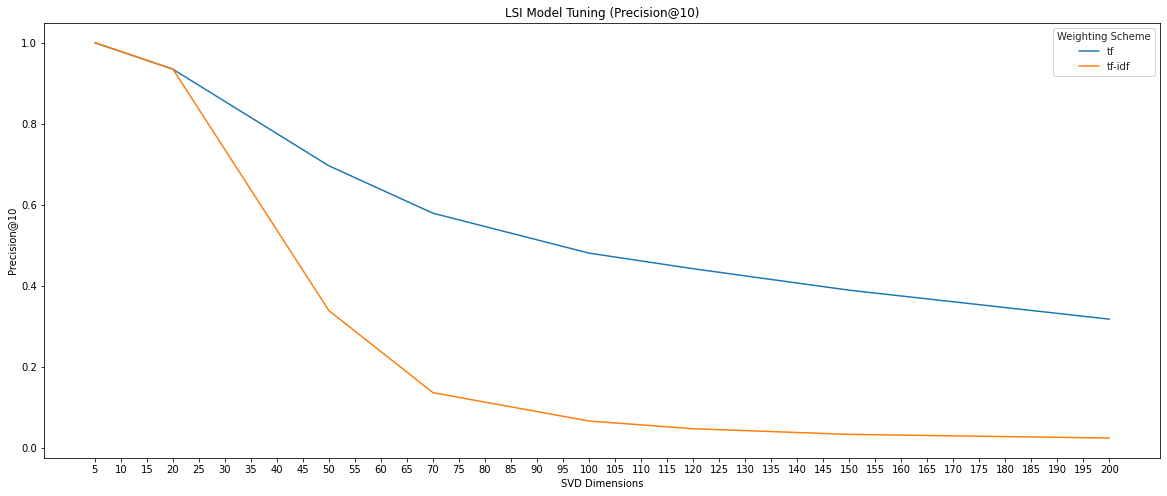

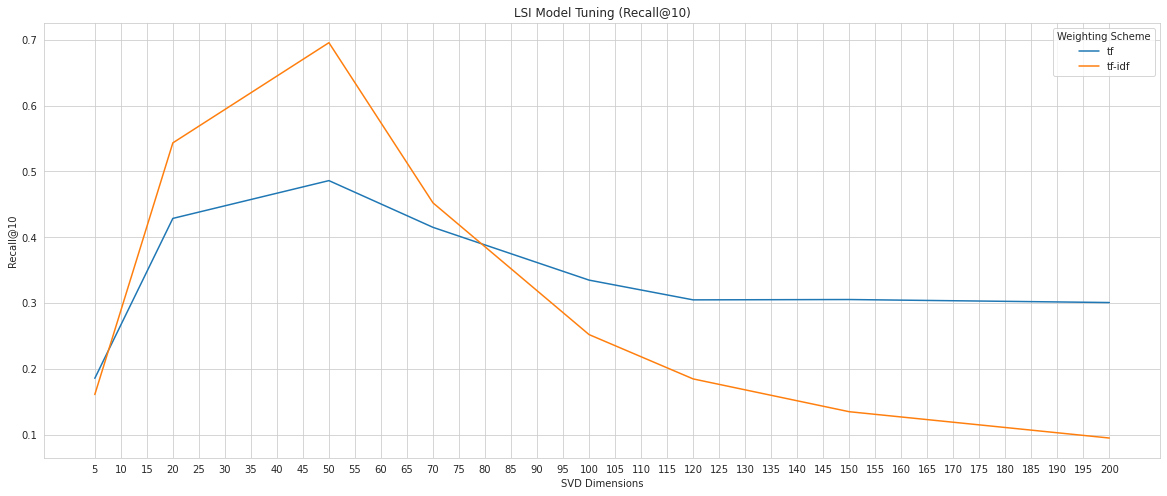

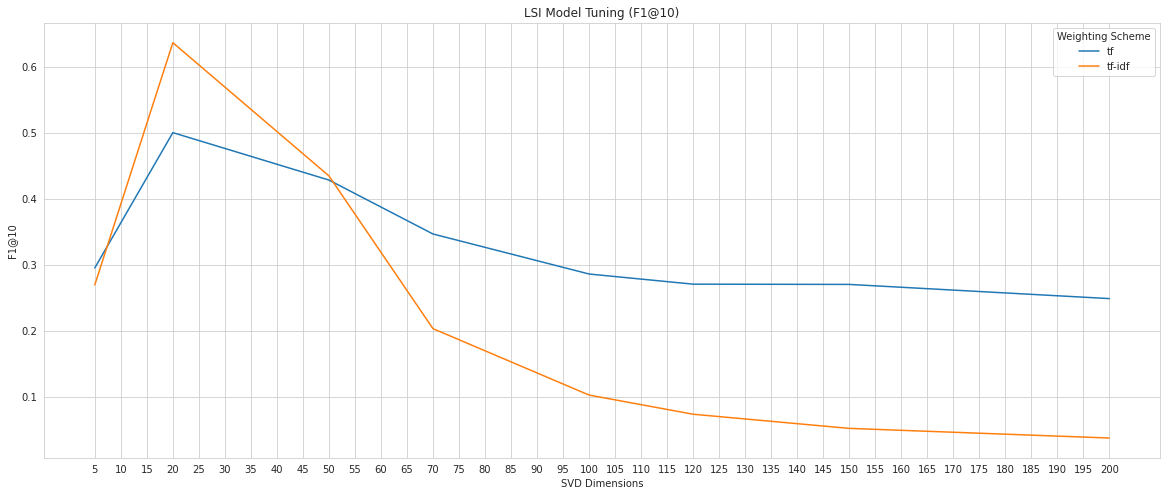

In [ ]:
# This code was adapted from: https://colab.research.google.com/drive/1uWX5keKYv1wE-IJ4YFLzwFaf42bqilbw?usp=sharing&authuser=2#scrollTo=SzMJC_hlynYq

# Here, we are going to use the cleaned_documents

# Defining different weighting schemes and SVD dimensions to try out
weighting_schemes = ['tf', 'tf-idf']
svd_dims = [5, 20, 50, 70, 100, 120, 150, 200]

# Define a pandas dataframe with 4 columns to visualize data
results_df = pd.DataFrame(columns=['Weighting Scheme', 'SVD Dimensions', 'Precision@10', 'Recall@10'])

# The idea now is to loop over the above defined weighting schemes and SVD Dimensions
for weighting_scheme in weighting_schemes:
    for svd_dim in svd_dims:
        # We follow the steps just like we did in the previous cells on 
        # vectorizing documents and fitting the SVD model.
        vectorizer = TfidfVectorizer(vocabulary=vocab, use_idf=weighting_scheme=='tf-idf')
        svd = TruncatedSVD(n_components=svd_dim)

        # We use the cleaned_documents that we processed above.
        X = vectorizer.fit_transform(cleaned_documents)
        X_svd = svd.fit_transform(X)

        # Make blank lists to store the performance metrics.
        precision_scores = []
        recall_scores = []

        # Looping over the queries.
        for i in range(len(cleaned_documents)):
            # Grab one query document.
            query = cleaned_documents[i]

            # Vectorize query and fit SVD model.
            query_vec = svd.transform(vectorizer.transform([query]))

            # Computing cosine similarities between the query and documents.
            sim_scores = cosine_similarity(query_vec, X_svd)

            # Retrieving top 10 documents in descending order.
            top_docs_indices = np.argsort(sim_scores, axis=1)[:, -11:-1]
            top_docs_similarities = np.take_along_axis(sim_scores, top_docs_indices, axis=1)

            # Calculating precision and recall for the top 10 similar reviews.
            relevant_indices = np.where(top_docs_similarities[0] > 0.5)[0]
            if len(relevant_indices) > 0:
                precision_scores.append(len(relevant_indices) / 10)
                recall_scores.append(len(relevant_indices) / len(np.where(sim_scores > 0.5)[0]))
            else:
                precision_scores.append(0)
                recall_scores.append(0)

        # After storing every score (of the top 10 review) we calculate the averages/mean.
        mean_precision = np.mean(precision_scores)
        mean_recall = np.mean(recall_scores)

        # Lastly, we calculate the F1 score for top 10 reviews.
        with np.errstate(divide='ignore', invalid='ignore'):
            f1_scores = 2 * np.array(precision_scores) * np.array(recall_scores) / (np.array(precision_scores) + np.array(recall_scores))
        # Including these lines for avoiding divide by 0 warning and dummy output.
        f1_scores = np.nan_to_num(f1_scores, nan=0.0)


        # For observing, we make a dataframe
        df = pd.DataFrame({
            'Weighting Scheme': [weighting_scheme],
            'SVD Dimensions': [svd_dim],
            'Precision@10': [mean_precision],
            'Recall@10': [mean_recall],
            'F1@10': [np.mean(f1_scores)]
        })
        results_df = pd.concat([results_df, df], ignore_index=True)

# Reset the index 
results_df.reset_index(drop=True, inplace=True)

# Print the results dataframe
print(results_df)


# For making graphs, we plot results using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 8))
sns.set_style("whitegrid")
sns.lineplot(data=results_df, x="SVD Dimensions", y="Precision@10", hue="Weighting Scheme", markers=True)
plt.title('LSI Model Tuning (Precision@10)')
plt.xlabel('SVD Dimensions')
plt.ylabel('Precision@10')
plt.xticks(np.arange(min(svd_dims), max(svd_dims)+1, 5))
plt.show()

fig, ax = plt.subplots(figsize=(20, 8))
sns.set_style("whitegrid")
sns.lineplot(data=results_df, x="SVD Dimensions", y="Recall@10", hue="Weighting Scheme", markers=True)
plt.title('LSI Model Tuning (Recall@10)')
plt.xlabel('SVD Dimensions')
plt.ylabel('Recall@10')
plt.xticks(np.arange(min(svd_dims), max(svd_dims)+1, 5))
plt.show()

fig, ax = plt.subplots(figsize=(20, 8))
sns.set_style("whitegrid")
sns.lineplot(data=results_df, x="SVD Dimensions", y="F1@10", hue="Weighting Scheme", markers=True)
plt.title('LSI Model Tuning (F1@10)')
plt.xlabel('SVD Dimensions')
plt.ylabel('F1@10')
plt.xticks(np.arange(min(svd_dims), max(svd_dims)+1, 5))
plt.show()


<b>Findings:</b> 

1.   Initially I was using the Tf-idf model with 50 SVD Dimensions but after plotting these graphs I tried using the Tf-idf model with 20 SVD Dimensions and then matched the retrieved reviews with File 2 and it turns out that the later model performed the best.
2.   Upon comparing the models, the Tf-idf model with 20 SVD dimensions retrieved 3/8 similar top 1 result as compared to File 2.



<b> This cell might not properly render in the pdf </b>
The table shows how many reviews (among the top 10 similar reviews) corresponded to the IDs in <i>File 2</i>

<table>
  <thead>
    <tr>
      <th></th>
      <th>Tfidf-50</th>
      <th>Tfidf-20</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Query 1</td>
      <td>8</td>
      <td>10</td>
    </tr>
    <tr>
      <td>Query 2</td>
      <td>3</td>
      <td>6</td>
    </tr>
    <tr>
      <td>Query 3</td>
      <td>6</td>
      <td>9</td>
    </tr>
    <tr>
      <td>Query 4</td>
      <td>7</td>
      <td>9</td>
    </tr>
    <tr>
      <td>Query 5</td>
      <td>4</td>
      <td>4</td>
    </tr>
    <tr>
      <td>Query 6</td>
      <td>8</td>
      <td>7</td>
    </tr>
    <tr>
      <td>Query 7</td>
      <td>6</td>
      <td>9</td>
    </tr>
    <tr>
      <td>Query 8</td>
      <td>6</td>
      <td>7</td>
    </tr>
  </tbody>
</table>



In [ ]:
# blank cell for some output formatting 

#<b> TASK 3: Neural Information Retrieval Model</b>

##<b> Part a: Developing a Neural Information Retrieval Model

In [ ]:
# The idea here is to first create our own neural IR Model and check how it performs.

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Loading and preprocessing again to avoid confusion 
df = pd.read_csv(data_path + 'JewelleryReviewsLSA.csv')
documents = df['Reviews'].tolist()
ratings = df['Ratings'].tolist()

# Cleaning documents with previously defined function
cleaned_documents = clean_doc(documents)

# Defining the vectorizer
vectorizer = TfidfVectorizer(vocabulary=vocab)

# Vectorizing the reviews and queries
X = vectorizer.fit_transform(cleaned_documents)
y = ratings

# Sorting the indices of X
X.sort_indices()

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting y_train to binary class matrix
num_classes = np.max(y_train) + 1
y_train_binary = to_categorical(y_train, num_classes)

# We are converting to binary class matrix becasue we are using ratings
# as the targets. 

# Ratings (1 to 5) becomes nx5 matrix.

# Converting y_test to binary class matrix
y_test_binary = to_categorical(y_test, num_classes)

# Defining the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Finally, train the model
history = model.fit(X_train, y_train_binary, validation_data=(X_test, y_test_binary), epochs=50, batch_size=64, verbose=1)

# I trained the model with different parameters but this seem to be the best one.

# Evaluating the accuracy.
loss, accuracy = model.evaluate(X_test, y_test_binary, verbose=0)
print(f'Test accuracy: {(accuracy*100):.3}')

Epoch 1/50
3/3 [==============================] - 1s 149ms/step - loss: 1.7929 - accuracy: 0.1063 - val_loss: 1.7705 - val_accuracy: 0.3000
Epoch 2/50
3/3 [==============================] - 0s 24ms/step - loss: 1.7539 - accuracy: 0.4812 - val_loss: 1.7449 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 1.7185 - accuracy: 0.6125 - val_loss: 1.7206 - val_accuracy: 0.6000
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 1.6845 - accuracy: 0.6187 - val_loss: 1.6962 - val_accuracy: 0.6250
Epoch 5/50
3/3 [==============================] - 0s 14ms/step - loss: 1.6512 - accuracy: 0.6250 - val_loss: 1.6711 - val_accuracy: 0.6250
Epoch 6/50
3/3 [==============================] - 0s 15ms/step - loss: 1.6159 - accuracy: 0.6250 - val_loss: 1.6453 - val_accuracy: 0.6250
Epoch 7/50
3/3 [==============================] - 0s 12ms/step - loss: 1.5773 - accuracy: 0.6250 - val_loss: 1.6186 - val_accuracy: 0.6250
Epoch 8/50
3/3 [==========

In [ ]:
# Predicting the ratings for the test set
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
# convert the predicted ratings from one-hot encoding to integers
y_pred_int = np.argmax(y_pred, axis=1)

# compute evaluation metrics
# accuracy = accuracy_score(y_test, y_pred_int)
precision = precision_score(y_test, y_pred_int, average='weighted',zero_division=1)
recall = recall_score(y_test, y_pred_int, average='weighted')
f1 = f1_score(y_test, y_pred_int, average='weighted')

# print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-score: {f1:.3f}')

Precision: 0.761
Recall: 0.675
F1-score: 0.581


### Comparing the performance of LSI and Neural IR Model

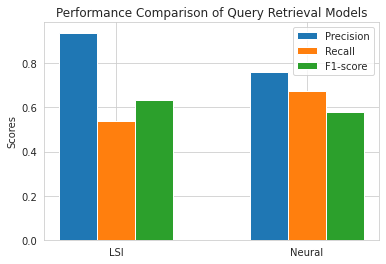

In [ ]:
# tf-idf             20        p 0.9395   r 0.537216  f1 0.634233
labels = ['LSI', 'Neural']
precision_scores = [0.939, 0.761]
recall_scores = [0.537, 0.675]
f1_scores = [0.634, 0.581]

# This is the label locations
x = np.arange(len(labels))
# This is the width of the bars  
width = 0.2  


# Now we plot the findings.
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision_scores, width, label='Precision')
rects2 = ax.bar(x, recall_scores, width, label='Recall')
rects3 = ax.bar(x + width, f1_scores, width, label='F1-score')


ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Query Retrieval Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


From this bar plot, we can see that the Neural Information retrieval model performs worse that the best tuned LSI model for 2 of the 3 evaluation metrics (Precision, Recall and F1-Score). Out of the 2 metrics, one of them is F1 Score which is the most important metric as it is a measure that uses both precision and recall. Thus, I will try to use the pre-trained BART Model for Information retrieval.

### <b> BERT for Information Retrieval

In [ ]:
!pip install transformers
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 75.9 MB/s eta 0:00:00


In [ ]:
# This code was adapted from: https://huggingface.co/bert-base-uncased

# Load the pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# This code was adapted from: https://huggingface.co/bert-base-uncased

reviews = cleaned_documents.copy()
tokenized_reviews = tokenizer(reviews, padding=True, truncation=True, return_tensors="pt")

# Extract the BERT embeddings for the preprocessed reviews
with torch.no_grad():
    model_output = model(**tokenized_reviews)
    embeddings = model_output.last_hidden_state[:, 0, :].numpy()

ids = df['ID'].tolist()

In [ ]:
# This code was adapted from: https://huggingface.co/bert-base-uncased

def find_similar_reviews(query):
    # Preprocess the query text data
    query = query.lower()
    tokenized_query = tokenizer([query], padding=True, truncation=True, return_tensors="pt")

    # Extract the BERT embedding for the preprocessed query
    with torch.no_grad():
        model_output = model(**tokenized_query)
        query_embedding = model_output.last_hidden_state[:, 0, :].numpy()

    # Calculate the cosine similarity between the query embedding and the review embeddings
    similarities = cosine_similarity(query_embedding, embeddings)

    # Sort the reviews based on their similarity score
    top_indices = similarities[0].argsort()[::-1][:50]
    top_reviews = [(ids[i], reviews[i], similarities[0][i]) for i in top_indices]

    # Store the top 50 ID and reviews to use later.
    return top_reviews


In [ ]:
def print_similar_reviews(query, num_reviews):
    """
    This function uses the previous function but then limits 
    """
    similar_reviews = find_similar_reviews(query)[:50]
    top_reviews = []
    print(f"Top {num_reviews} similar reviews for query '{query}':\n")
    for i, review in enumerate(similar_reviews[:num_reviews]):
        print(f"Review {i+1}. Similarity score: {review[2]:.2f}")
        print(f"ID {review[0]}: {review[1]}")
        print('-' * 100)
        top_reviews.append((review[0], review[1], review[2]))
    return top_reviews


In [ ]:
def get_review_list(lst):
    return [review[1] for review in lst]


## <b> Part b: Interactive query generation

In [ ]:
# The idea here is to create a small GUI to interact with a custom query
import ipywidgets as widgets
from IPython.display import clear_output


query_input = widgets.Text(value='',placeholder='Enter a query',description='Query:',disabled=False)

num_reviews_slider = widgets.IntSlider(value=5, min=1, max=50, step=1, description='Num Reviews:', disabled=False, 
                                       continuous_update=False, orientation='horizontal', readout=True, readout_format='d')

submit_button = widgets.Button(description='Submit', button_style='success')

output = widgets.Output()

last_query = 'arrived promptly and happy with the seller'

def on_submit_button_clicked(b):
    global last_query
    
    with output:
        clear_output()
        query = query_input.value
        num_reviews = num_reviews_slider.value
        print_similar_reviews(query, num_reviews)
        
        last_query = query

submit_button.on_click(on_submit_button_clicked)

display(widgets.VBox([query_input, num_reviews_slider, submit_button, output]))

<b> Enter a query above and hit submit to get the top similar reviews 😁
</b> <br>You can use the feature as many times as you want.
<br> If no query is submitted, then the default query is set to <i>'arrived promptly and happy with the seller'</i> to avoid error.
<br> You can adjust the slider according to you to retrieve the top 'n' reviews.

In [ ]:
# We create an input for the next task
topic_modelling_input = get_review_list(find_similar_reviews(last_query))

# <b> TASK 4: Topic Modelling </b>

## <b> Part a: Implementing Latent Dirichlet Allocation (LDA)

In [ ]:
"""
Please do ignore the df2 naming convention as I was previously working with
dataframe but then decided to switch to list because I had to convert it to
a list anyway
"""
df2 = topic_modelling_input.copy()

In [ ]:
# Define the countvectorizer
cv = CountVectorizer(vocabulary = vocab)

In [ ]:
# dtm - document term matrix
dtm = cv.fit_transform(df2)

In [ ]:
dtm

<50x1362 sparse matrix of type '<class 'numpy.int64'>'
	with 514 stored elements in Compressed Sparse Row format>

In [ ]:
# Performing Latent Dirichlet Allocation (LDA)
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
LDA = LatentDirichletAllocation(n_components = 5, random_state = 42)

In [ ]:
# Fit the LDA with the document term matrix
LDA.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
for i, topic in enumerate(LDA.components_):
    print(f"The top 10 words for the topic {i+1}")
    print([cv.get_feature_names_out()[index] for index in topic.argsort()[-15:]])
    print('\n\n')

The top 10 words for the topic 1
['wear', 'great', 'received', 'anyone', 'picture', 'would', 'like', 'beautiful', 'one', 'looks', 'bought', 'rings', 'nice', 'love', 'ring']



The top 10 words for the topic 2
['product', 'condition', 'order', 'everyday', 'sparkle', 'good', 'arrived', 'dressing', 'dainty', 'speedy', 'pleased', 'use', 'purchase', 'ridiculously', 'shipping']



The top 10 words for the topic 3
['break', 'time', 'arrived', 'wearing', 'perfectly', 'looking', 'sparkle', 'hoped', 'every', 'want', 'nice', 'true', 'bracelet', 'perfect', 'wear']



The top 10 words for the topic 4
['looking', 'rings', 'date', 'amazon', 'order', 'condition', 'wonderful', 'wear', 'something', 'product', 'one', 'came', 'item', 'like', 'ring']



The top 10 words for the topic 5
['beyond', 'nice', 'definitely', 'got', 'item', 'love', 'like', 'know', 'great', 'would', 'recommend', 'wanted', 'one', 'quality', 'ring']





In [ ]:
dtm

<50x1362 sparse matrix of type '<class 'numpy.int64'>'
	with 514 stored elements in Compressed Sparse Row format>

In [ ]:
# Grab and attach the topics
topic_results = LDA.transform(dtm)

In [ ]:
topic_results.shape

(50, 5)

In [ ]:
topic_results[0].round(2)

array([0.02, 0.02, 0.02, 0.02, 0.92])

The above means that top-most similar query has 97% probability to correlate to topic 5

In [ ]:
df3 = pd.DataFrame(df2, columns = ['Reviews'])
df3['Topic'] = topic_results.argmax(axis = 1)
df3['Topic'] = df3['Topic'] + 1

In [ ]:
df3

,Reviews,Topic
0,got ring promise ring girlfriend christmas lov...,5
1,eve's addiction wonderful sending ring ring be...,1
2,always wanted claddaugh ring.this price great....,5
3,"ring exactly wanted, actually bought another q...",1
4,disappointed quality item. fragile thin discol...,4
5,bought ring husband loved it. received said wo...,1
6,nice looks picture. :) like it. :),1
7,sparkle. pretty dainty. looking for.,2
8,item great quality came promptly. i'm happy re...,5
9,birthday gift 16 yo niece. loves ring happy re...,1


<b>Note that these reviews are cleaned reviews.</b>

## <b> Part b: Visualizing Topics, Reviews and Keywords

In [ ]:
import ipywidgets as widgets
from IPython.display import clear_output

# Creating a dropdown menu to select a topic
topic_dropdown = widgets.Dropdown(options=[f"Topic {i+1}" for i in range(5)], description='Select Topic')

# This function is to display the top keywords for the selected topic
def display_topic_keywords(topic_num):
    topic_keywords = [cv.get_feature_names_out()[index] for index in LDA.components_[topic_num-1].argsort()[-10:]]
    print(f"Top 10 keywords for Topic {topic_num}:")
    print(topic_keywords)
    topic_reviews = df3[df3['Topic'] == topic_num]['Reviews'].tolist()
    print(f"\nCleaned reviews belonging to Topic {topic_num}:")
    for i, review in enumerate(topic_reviews):
        print(f"{i+1}. {review}")


# Define a function to update the output area when the user selects a new topic
def on_topic_select(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output_area:
            clear_output()
            topic_num = int(change['new'].split()[-1])
            display_topic_keywords(topic_num)

# Add a callback to the dropdown widget to update the output area
topic_dropdown.observe(on_topic_select)

# Display the dropdown widget and output area
display(topic_dropdown)
output_area = widgets.Output()
display(output_area)


Dropdown(description='Select Topic', options=('Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5'), value='T…

Output()

<i> Please Select a topic from the drop-down box to get the top 10 words of your selected topic. 😁

Additionally, you can also see the cleaned reviews that are classified in that particular topic.</i>

# <b> TASK 5: Text Summarisation </b>

## <b>Part a: Summarisation and Performance evaluation</b>

### a(i) Unsupervised summarisation with Gensim

In [ ]:
"""
This function is created for ease of using it later on in User Interface,
Displaying results and Summarisation.

NOTE: This part retrieves the uncleaned top reviews but the cosine similarity
acts upon cleaned documents.
"""

def get_unconcatenated_reviews(query_list):
    unconcatenated_reviews_list = []
    query_list = clean_doc(query_list)
    for query in query_list:
        # Transforming the query into a vector
        query_vec = vectorizer.transform([query])

        # Calculating the cosine similarity between the query and all reviews.
        cos_sim = cosine_similarity(query_vec, X)

        # Create a dataframe with the results and retrieve the similar reviews
        results = df[['ID', 'Reviews', 'Ratings']].copy()
        # Create a column of cosine similarity
        results['Cosine Similarity'] = cos_sim.T

        # Make a dataframe of the top 10 reviews and sort it in descending order based on cosine similarity
        top_10 = results.nlargest(10, 'Cosine Similarity')

        # Store the top 10 reviews in a list
        top_10_reviews = top_10['Reviews'].tolist()

        # Append the concatenated reviews to the list
        unconcatenated_reviews_list.append(top_10_reviews)

    return unconcatenated_reviews_list


In [ ]:
q2 = get_unconcatenated_reviews(q)
# We will put the result of this to chatGPT later on for generating target reviews
# which will be used to train the bert model for summarization.

In [ ]:
def get_concatenated_reviews(query_list):
    concatenated_reviews_list = []
    query_list = clean_doc(query_list)
    for query in query_list:
        # transforming the query into a vector
        query_vec = vectorizer.transform([query])

        # Calculate the cosine similarity between the query and all reviews.
        cos_sim = cosine_similarity(query_vec, X)

        # Create a dataframe with the results and retrieve the similar reviews
        results = df[['ID', 'Reviews', 'Ratings']].copy()
        # Create a column of cosine similarity
        results['Cosine Similarity'] = cos_sim.T

        # Make a dataframe of the top 10 reviews and sort it in descending order based on cosine similarity
        top_10 = results.nlargest(10, 'Cosine Similarity')

        # Store the top 10 reviews in a list
        top_10_reviews = top_10['Reviews'].tolist()

        # Join the list of top 10 reviews into a single string
        concatenated_reviews = ' '.join(top_10_reviews)

        # Append the concatenated reviews to the list
        concatenated_reviews_list.append(concatenated_reviews)

    return concatenated_reviews_list


In [ ]:
queries_concat = get_concatenated_reviews(q)

In [ ]:
"""
This code block is used to demonstrate the summarization
of reviews of the 8 queries by gensim. We concatenate the
queries because gensim requires long texts to summarize.

Also, we can look at a method of how an unsupervised
summarisation works! 
"""

from gensim.summarization import summarize

def print_summaries(queries_concat):
    j = 0
    for i in queries_concat:
        print('-'*100)
        print("QUERY: ", q[j])
        j+=1
        print('-'*100)
        summary = summarize(i, ratio=0.2)
        print("SUMMARY of top 10 related reviews:\n")
        print(summary)
        print('-'*100)
        print("\n\n")

In [ ]:
print_summaries(queries_concat)

----------------------------------------------------------------------------------------------------
QUERY:  The ring is a great gift. My friend loves it
----------------------------------------------------------------------------------------------------
SUMMARY of top 10 related reviews:

my wife loves the ring, it was a great gift.
She loves the ring and was very happy to have received it.
My mother loved this and was a great birthday gift.
I wear the ring on my index finger and it fits great!
----------------------------------------------------------------------------------------------------



----------------------------------------------------------------------------------------------------
QUERY:  horrible bad quality bracelet
----------------------------------------------------------------------------------------------------
SUMMARY of top 10 related reviews:

The quality of the clasp is quite poor and it gradually lost it ability to stay closed.
I ended up returning the bracel

### a(ii) Supervised summarisation with BERT

In [ ]:
# This enables us to see every related reviews and we can copy paste it into ChatGPT to get target summaries
def print_to_feedGPT(similar_result_list):
    c = 1
    for i in similar_result_list:
        print(f"Query {c} Similar results")
        print()
        for j in i:
            print(j)
        print('-'*100)
        print('\n')
        c += 1

In [ ]:
#q2

In [ ]:
# This enables us to see every related reviews and we can copy paste it into ChatGPT to get target summaries
print_to_feedGPT(q2)

Query 1 Similar results

my wife loves the ring, it was a great gift. extremelly cheap and high quality.
This ring has such a good sparkle and it looks like a ring that should cost 10x the amount. Makes a great gift for someone on a budget. My girlfriend loves it.
This was a birthday gift for my 16 YO niece. She loves the ring and was very happy to have received it.
My neice loves her birth stone so I got it for her for a Christmas Gift.I also love it also. great
this product made for a great gift and great memorize for my love and me. It something we will always have. a helping gift from the heart that always shows you care.
My mother loved this and was a great birthday gift. These look even better in person and go great with anything.
I love my birthstone and I wanted a piece of jewelry that symbolized the simple purity of the Blue Topaz. This ring did that for me. As a gift to myself for my birthday this year, it was definitely a great gift and a welcomed addition to my collection.


<b>The following list is the list of summarized reviews of every query (Query 1 to Query 8) which was summarized by ChatGPT.</b>

In [ ]:
# We use this list as the target summaries
chat_GPT_targets = ["These are reviews for a ring that is described as a great gift that is both cheap and high-quality. The ring has a good sparkle and looks more expensive than it actually is. It is often given as a gift to family members such as nieces, girlfriends, mothers, and even to oneself. However, it cannot be resized due to its design. People love the ring's simple purity and wear it regularly for everyday occasions.",
                    "These are reviews for a bracelet. Some reviewers express disappointment in the quality of the bracelet, citing issues with the clasp, poor gemstone quality, and flimsiness. Others feel that the bracelet looks nice and is good quality, recommending it for purchase. One reviewer mentions a specific use for the bracelet, imagining it as a toe ring.",
                    "These are reviews for various products from a seller on Amazon. Most reviewers are happy with the quality of the item they received, with some mentioning that it arrived promptly and in good condition. Some reviewers also praise the seller for their professional service and good communication regarding shipping and delivery. One reviewer experienced slow shipping, but others express satisfaction with the seller's customer service.",
                    "The products mentioned include casual wear items such as pendants, lapel pins, necklaces, and rings. They are generally comfortable to wear and are suitable for everyday wear. Some items are also appropriate for formal occasions. One reviewer wears a charm in memory of friends who have passed away, while another notes that the metal of a ring was too soft and bent easily. Overall, the products are received positively for their unique style and quality.",
                    "One customer was disappointed with an item that was misrepresented in size and quality but cannot return it because it was sent to a family member in the Coast Guard. Another customer was satisfied with the prompt delivery and quality of their item. A third customer found the silver necklace to be of poorer quality than expected, while a fourth found the item to be flimsy and would not recommend it. A fifth customer took a chance on buying jewelry online and was impressed with the quality and appearance of the item. A sixth customer returned an item that was hollow and not of good quality. A seventh customer found an item to be attractive and high quality but too small for an adult. An eighth customer found a ring to be too small for their ring finger and would have been better as a pinky ring. A ninth customer was not satisfied with the quality of an item due to scratches, misaligned hinges, and inconsistent staining.",
                    "The reviews discuss the color and quality of various jewelry items. Some customers mention that the color of the item they received was not as expected from the picture, while others comment on the beauty and shine of the stones. Overall, the reviewers are pleased with the quality and appearance of the items they received.",
                    "These are reviews of various rings received by customers, with mixed opinions. Some customers were disappointed because the rings did not look like the pictures, with smaller or flawed diamonds or different colors. Other customers were satisfied with their purchases and thought the rings looked beautiful, even though they may not have looked exactly like the pictures. One customer was disappointed with the lack of description provided by Amazon.",
                    "The feedback includes comments on various jewelry items. Some customers were satisfied with the products and found them to be of good quality and appearance, matching the picture. Others, however, were disappointed, stating that the items were smaller than expected, made of poor quality materials, had flaws, or didn't match the picture or description."]

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("sshleifer/distilbart-xsum-12-1")
model = AutoModelForSeq2SeqLM.from_pretrained("sshleifer/distilbart-xsum-12-1")

"""
distilbart-xsum-12-1 is probably the best DistilBART model. You can check
more about the different tpyes of DistilBART model and their performance
mertrics here: https://huggingface.co/sshleifer/distilbart-xsum-12-1
"""

'\ndistilbart-xsum-12-1 is probably the best DistilBART model. You can check\nmore about the different tpyes of DistilBART model and their performance\nmertrics here: https://huggingface.co/sshleifer/distilbart-xsum-12-1\n'

In [ ]:
# This code was adapted from: https://huggingface.co/docs/transformers/model_doc/bart#transformers.BartForConditionalGeneration

def summarize_with_bert(input_text_list, target_text_list):
    # Creating an empty list to store the summaries
    summaries = []

    # Loop through each input text and its corresponding target summary
    for input_text, target_text in zip(input_text_list, target_text_list):
        # Encode the input text and target text using the tokenizer
        input_ids = tokenizer.encode(input_text, return_tensors='pt', max_length=1024, truncation=True)
        target_ids = tokenizer.encode(target_text, return_tensors='pt', max_length=56, truncation=True)

        # Generating the summary using the model
        summary_ids = model.generate(input_ids, num_beams=4, max_length=56, early_stopping=True, length_penalty=2.0)

        # Decoding the summary to readable words and add it to the list of summaries
        summary = tokenizer.decode(summary_ids.squeeze(), skip_special_tokens=True)
        summaries.append(summary)

    # Return the list of summaries
    return summaries


In [ ]:
summaries_bert = summarize_with_bert(queries_concat, chat_GPT_targets)

In [ ]:
def print_bert_summaries(q):
    c = 1
    for i in q:
        print(f"Query {c} top 10 results summary:")
        print()
        print(i)
        print('-'*100)
        print('\n')
        c += 1

In [ ]:
print_bert_summaries(summaries_bert)

Query 1 top 10 results summary:

 A diamond ring that was a gift to a girl's birthstone has been described as a "great gift" for a gift.
----------------------------------------------------------------------------------------------------


Query 2 top 10 results summary:

 The price of an Italian Charm Bracelet has been sold for $45,000 (Â£40,000) after being sold off.
----------------------------------------------------------------------------------------------------


Query 3 top 10 results summary:

 A wedding ring has been a good for the first time after ordering the delivery of a cross from the Amazon.
----------------------------------------------------------------------------------------------------


Query 4 top 10 results summary:

 A pair of gold and a lapel pin in memory of friends who have been given the go-ahead by A&E.
----------------------------------------------------------------------------------------------------


Query 5 top 10 results summary:

 A pair of gold and

### <b> a(iii) Evaluation of BERT model</b>

In [ ]:
!pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# This code was adapted from: https://pypi.org/project/rouge/

from rouge import Rouge

rouge = Rouge()

def evaluate_summaries(summaries, targets):
    # Create empty lists to store the scores
    rouge1_scores = []
    rouge2_scores = []
    rougeL_scores = []

    # Loop through each summary and its corresponding target summary.
    # ChatGPT helped me in making this for loop link to iterate at the same time.
    for summary, target in zip(summaries, targets):
        # Calculating the ROUGE scores using the rouge library.
        scores = rouge.get_scores(summary, target)

        # Appending the ROUGE scores to the corresponding lists
        rouge1_scores.append(scores[0]['rouge-1']['f'])
        rouge2_scores.append(scores[0]['rouge-2']['f'])
        rougeL_scores.append(scores[0]['rouge-l']['f'])

    # Computing the average ROUGE scores across all summaries
    avg_rouge1 = sum(rouge1_scores) / len(rouge1_scores)
    avg_rouge2 = sum(rouge2_scores) / len(rouge2_scores)
    avg_rougel = sum(rougeL_scores) / len(rougeL_scores)

    # Printing the average ROUGE scores
    print("ROUGE-1 Score: ", avg_rouge1)
    print("ROUGE-2 Score: ", avg_rouge2)
    print("ROUGE-L Score: ", avg_rougel)


In [ ]:
evaluate_summaries(summaries_bert, chat_GPT_targets)


ROUGE-1 Score:  0.16282461466666057
ROUGE-2 Score:  0.04035597247016812
ROUGE-L Score:  0.1536376487410498


In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu
nltk.download('punkt')

def evaluate_bleu(summaries, targets):
    # Create an empty list to store the BLEU scores
    bleu_scores = []

    # Loop through each summary and its corresponding target summary
    for summary, target in zip(summaries, targets):
        # Tokenize the summary and target using NLTK
        summary_tokens = nltk.word_tokenize(summary.lower())
        target_tokens = nltk.word_tokenize(target.lower())

        # Calculate the BLEU score using the NLTK sentence_bleu function
        bleu_score = sentence_bleu([target_tokens], summary_tokens, weights=(0.25, 0.25, 0.25, 0.25))

        # Append the BLEU score to the list of scores
        bleu_scores.append(bleu_score)

    # Compute the average BLEU score across all summaries
    avg_bleu = sum(bleu_scores) / len(bleu_scores)

    # Print the average BLEU score
    print("BLEU-4 Score: ", avg_bleu)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
evaluate_bleu(summaries_bert, chat_GPT_targets)

# I tried to find the reasons for these warnings so that I could resolve it but 
# unfortunately I could not do it right now due to time constraint.

BLEU-4 Score:  0.0020767147504416115


/usr/local/lib/python3.9/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.9/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.9/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg

<b> Findings: </b>



*   Looking at the low ROUGE scores and low BLEU-4 Score, I think that this model is not working very good with our summarizations.
*   One probable reason might be the fact that we are using target summaries which are generated by ChatGPT.



In [ ]:
# Blank cell for output formatting

## <b> Part b: Visualization

In [ ]:
"""THIS Code block is made with the help of ChatGPT.
Although ChatGPT helped in the pipeline of the events,
I made sure that it used the functions that I defined above
to carry out the core processes of retrieving and 
summarizing and not define anything new."""

import ipywidgets as widgets
from IPython.display import display

# Create the dropdown widget
query_dropdown = widgets.Dropdown(
    options=q,
    description='Select a query:'
)

# Create the button widget
query_button = widgets.Button(description='Get Reviews')

# Create the output widgets
reviews_output = widgets.VBox()
summary_output = widgets.Output()

# Create the function to retrieve the top reviews and summary for the selected query
def retrieve_reviews_and_summary(sender):
    selected_query = query_dropdown.value
    unconcatenated_reviews = get_unconcatenated_reviews([selected_query])[0]
    review_outputs = []
    for i, review in enumerate(unconcatenated_reviews):
        review_output = widgets.Output()
        with review_output:
            print(f'Review {i+1}: {review}\n')
        review_outputs.append(review_output)
    reviews_output.children = review_outputs

    # Generate the summary
    target_summary = chat_GPT_targets[q.index(selected_query)]
    concatenated_reviews = ' '.join(unconcatenated_reviews)
    summary = summarize_with_bert([concatenated_reviews], [target_summary])[0]

    # Clear the previous summary output
    summary_output.clear_output()

    with summary_output:
        print(f'Summary: {summary}\n')


# Add the function to the button widgets
query_button.on_click(retrieve_reviews_and_summary)

# Display the widgets
display(query_dropdown)
display(query_button)
display(reviews_output)
display(summary_output)


Dropdown(description='Select a query:', options=('The ring is a great gift. My friend loves it', 'horrible bad…

Button(description='Get Reviews', style=ButtonStyle())

VBox()

Output()

The above interface lets the user select one of the eight queries from the drop down box.

It will show the top-10 related reviews along with the summary that BERT has generated.😁

In [ ]:
# Blank cell for output formatting

In [ ]:
# %%shell
# jupyter nbconvert --to pdf ///content/COP509_214963.ipynb

[NbConvertApp] Converting notebook ///content/COP509_214963.ipynb to pdf
[NbConvertApp] Support files will be in COP509_214963_files/
[NbConvertApp] Making directory ./COP509_214963_files
[NbConvertApp] Making directory ./COP509_214963_files
[NbConvertApp] Making directory ./COP509_214963_files
[NbConvertApp] Making directory ./COP509_214963_files
[NbConvertApp] Writing 189868 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 293108 bytes to /content/COP509_214963.pdf
